# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rizky Wantoro
- **Email:** ticctocc28@gmail.com
- **ID Dicoding:** rizky_w_chpq

## Menentukan Pertanyaan Bisnis

- **Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda per hari?**

  - **Tujuan**: Memahami bagaimana kondisi cuaca tertentu (seperti clear, mist, atau light snow/rain) memengaruhi tingkat penyewaan sepeda.

- **Apakah terdapat pola musiman yang signifikan dalam jumlah penyewaan sepeda, dan bagaimana pola ini dapat memengaruhi strategi pengelolaan sistem?**

 - **Tujuan**: Mengidentifikasi fluktuasi penyewaan sepeda berdasarkan musim (spring, summer, fall, winter).

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_data = pd.read_csv('/content/sample_data/hour.csv')
day_data = pd.read_csv('/content/sample_data/day.csv')

**Insight:**
- Dataset berhasil dimuat.

## Assessing Data

###menilai data day_data

In [ ]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
day_data.duplicated().sum()

0

In [ ]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


###Menilai data hour_data

In [ ]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hour_data.duplicated().sum()

0

In [ ]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Struktur data telah dipahami.
- Tidak ditemukan nilai yang hilang.

## Cleaning Data

###Membersihkan data day_data

In [ ]:
# Check for duplicates
duplicates = day_data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# If duplicates exist, drop them
if duplicates > 0:
    daily_data = day_data.drop_duplicates()

Jumlah data duplikat: 0


###membersihkan data hour_data

In [ ]:
# Check for duplicates
duplicates = hour_data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# If duplicates exist, drop them
if duplicates > 0:
    daily_data = hour_data.drop_duplicates()

Jumlah data duplikat: 0


**Insight:**
- Tidak ditemukan data duplikat atau data sudah dibersihkan.

## Exploratory Data Analysis (EDA)

###Menggabungkan Data Harian dan Data Jam

In [ ]:
# Gabungkan dataset harian dan jam
merged_data = pd.merge(hour_data, day_data, how='inner', on=['dteday', 'season', 'weathersit', 'holiday', 'workingday'])

# Menampilkan informasi struktur data gabungan
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12880 entries, 0 to 12879
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     12880 non-null  int64  
 1   dteday        12880 non-null  object 
 2   season        12880 non-null  int64  
 3   yr_x          12880 non-null  int64  
 4   mnth_x        12880 non-null  int64  
 5   hr            12880 non-null  int64  
 6   holiday       12880 non-null  int64  
 7   weekday_x     12880 non-null  int64  
 8   workingday    12880 non-null  int64  
 9   weathersit    12880 non-null  int64  
 10  temp_x        12880 non-null  float64
 11  atemp_x       12880 non-null  float64
 12  hum_x         12880 non-null  float64
 13  windspeed_x   12880 non-null  float64
 14  casual_x      12880 non-null  int64  
 15  registered_x  12880 non-null  int64  
 16  cnt_x         12880 non-null  int64  
 17  instant_y     12880 non-null  int64  
 18  yr_y          12880 non-nu

**Insight:**
- Dataset gabungan memberikan detail lebih granular untuk analisis.

###Jumlah Penyewaan Berdasarkan Kondisi Cuaca

weathersit
1    1982472
2     534144
3      23236
Name: cnt_x, dtype: int64


<ipython-input-18-597faaccb3b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_rentals.index, y=weather_rentals.values, palette='viridis')


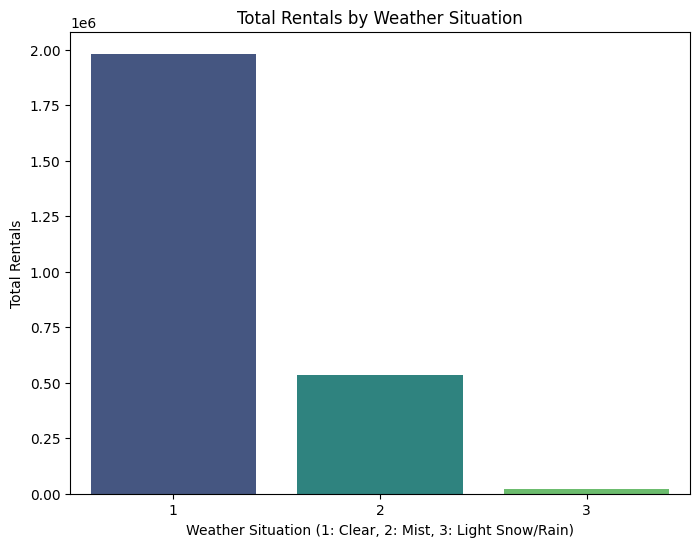

In [ ]:
# Total penyewaan berdasarkan kondisi cuaca
weather_rentals = merged_data.groupby('weathersit')['cnt_x'].sum().sort_values(ascending=False)

print(weather_rentals)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_rentals.index, y=weather_rentals.values, palette='viridis')
plt.title("Total Rentals by Weather Situation")
plt.xlabel("Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain)")
plt.ylabel("Total Rentals")
plt.show()


**Insight:**
- Sebagian besar penyewaan terjadi pada cuaca cerah.

###Jumlah Penyewaan Berdasarkan Musim

season
3    842056
2    678493
4    659474
1    359829
Name: cnt_x, dtype: int64


<ipython-input-19-8f78734f6f70>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rentals.index, y=season_rentals.values, palette='coolwarm')


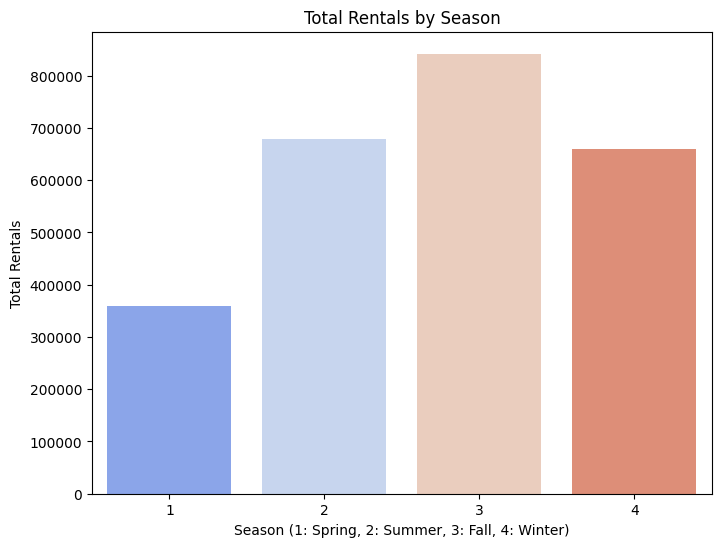

In [ ]:
# Total penyewaan berdasarkan musim
season_rentals = merged_data.groupby('season')['cnt_x'].sum().sort_values(ascending=False)

print(season_rentals)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=season_rentals.index, y=season_rentals.values, palette='coolwarm')
plt.title("Total Rentals by Season")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Total Rentals")
plt.show()


Insight:

- Musim panas dan musim gugur menunjukkan jumlah penyewaan tertinggi.

###Penyewaan Berdasarkan Status Hari Libur

holiday
0    2475780
1      64072
Name: cnt_x, dtype: int64


<ipython-input-20-6397eb01a57e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Working Day', 'Holiday'], y=holiday_rentals.values, palette='pastel')


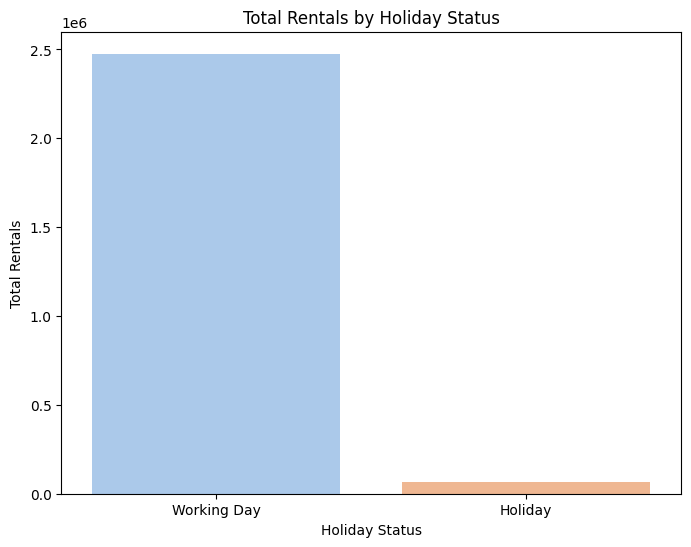

In [ ]:
# Distribusi penyewaan berdasarkan hari libur
holiday_rentals = merged_data.groupby('holiday')['cnt_x'].sum()

print(holiday_rentals)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=['Working Day', 'Holiday'], y=holiday_rentals.values, palette='pastel')
plt.title("Total Rentals by Holiday Status")
plt.xlabel("Holiday Status")
plt.ylabel("Total Rentals")
plt.show()


**Insight:**
- Sebagian besar penyewaan terjadi pada hari kerja, menunjukkan bahwa sepeda mungkin digunakan untuk kebutuhan transportasi rutin.

###Distribusi Penyewaan Berdasarkan Waktu

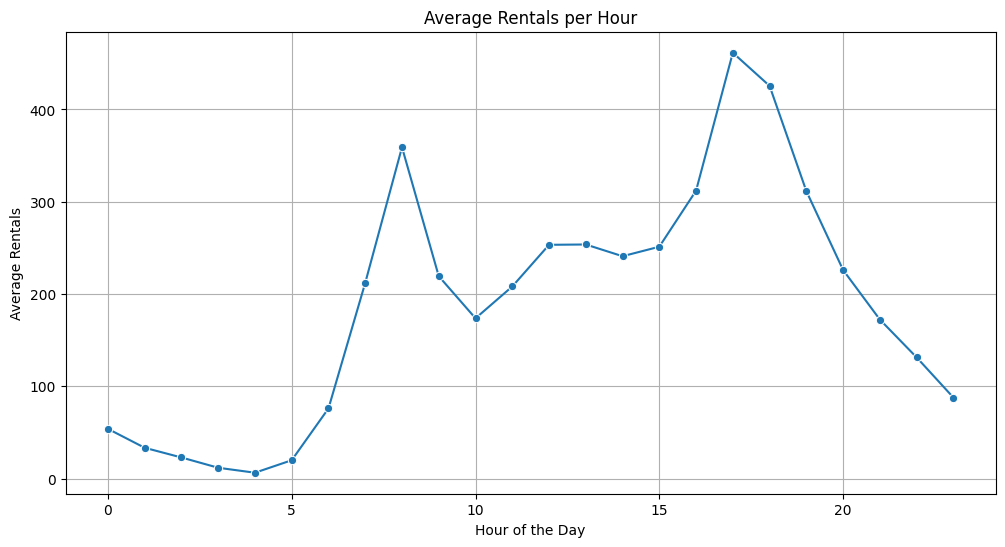

In [ ]:
# Distribusi penyewaan per jam
hourly_rentals = hour_data.groupby('hr')['cnt'].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o')
plt.title("Average Rentals per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.grid()
plt.show()


**Insight:**
- Penyewaan memuncak di pagi hari dan sore hari, mendukung hipotesis bahwa sepeda digunakan untuk perjalanan kerja.

## Visualization & Explanatory Analysis

###Analisis Pertanyaan 1: Pengaruh Faktor Cuaca terhadap Penyewaan Sepeda

<ipython-input-22-4fe490175dd5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_data, x='weathersit', y='cnt', palette='Set2')


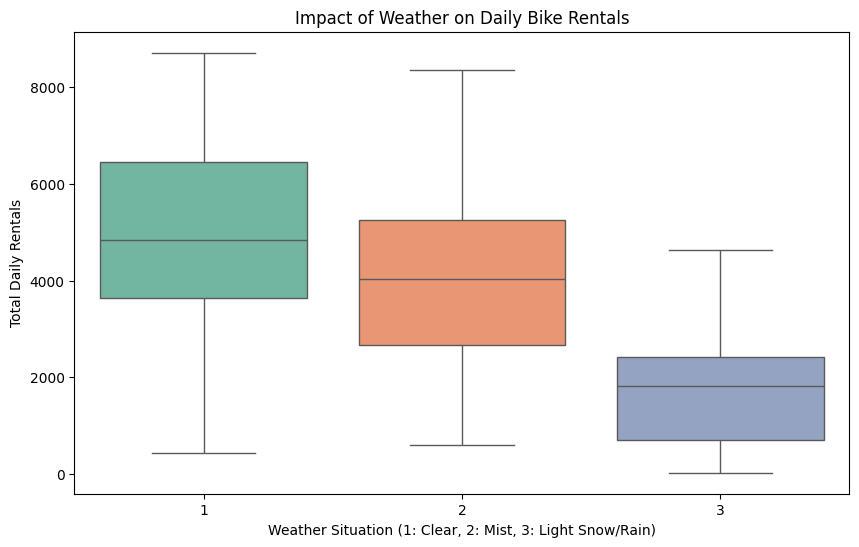

In [ ]:
# Boxplot for weather impact on bike rentals
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='weathersit', y='cnt', palette='Set2')
plt.title("Impact of Weather on Daily Bike Rentals")
plt.xlabel("Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain)")
plt.ylabel("Total Daily Rentals")
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi terjadi saat cuaca cerah.
- Penyewaan menurun saat cuaca memburuk.

<ipython-input-23-653d193a7255>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_data, x='season', y='cnt', palette='coolwarm')


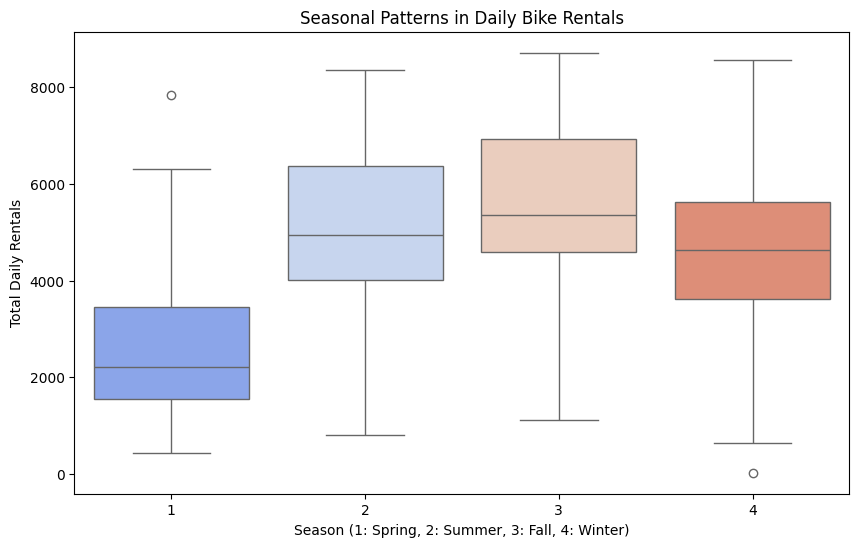

In [ ]:
# Boxplot for seasonal patterns in bike rentals
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='season', y='cnt', palette='coolwarm')
plt.title("Seasonal Patterns in Daily Bike Rentals")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Total Daily Rentals")
plt.show()

**Insight:**
- Grafik menunjukkan pola musiman yang jelas, dengan permintaan tertinggi pada musim panas dan gugur.

## Analisis Lanjutan (Opsional)

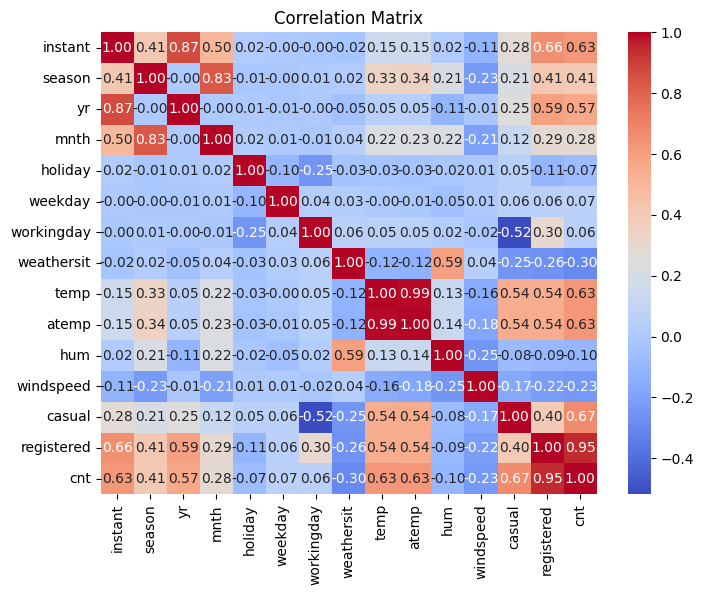

In [ ]:
plt.figure(figsize=(8, 6))
# Select only numerical features for correlation calculation
numerical_data = day_data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Conclusion

- Conclusion dari Pertanyaan 1

Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Operator dapat mempersiapkan lebih banyak sepeda saat cuaca cerah dan meminimalkan biaya operasional saat cuaca buruk.

- Conclusion dari Pertanyaan 2

Penyewaan sepeda bervariasi menurut musim, dengan permintaan tertinggi di musim panas dan musim gugur. Hal ini menunjukkan pentingnya strategi pemasaran musiman dan pengelolaan stok sepeda.